# **Class 3: Python OOP Advanced Part 2**

In [3]:
from IPython.display import Image, display
project_path = r'../../Capstone_Repo/CapstoneProject/'

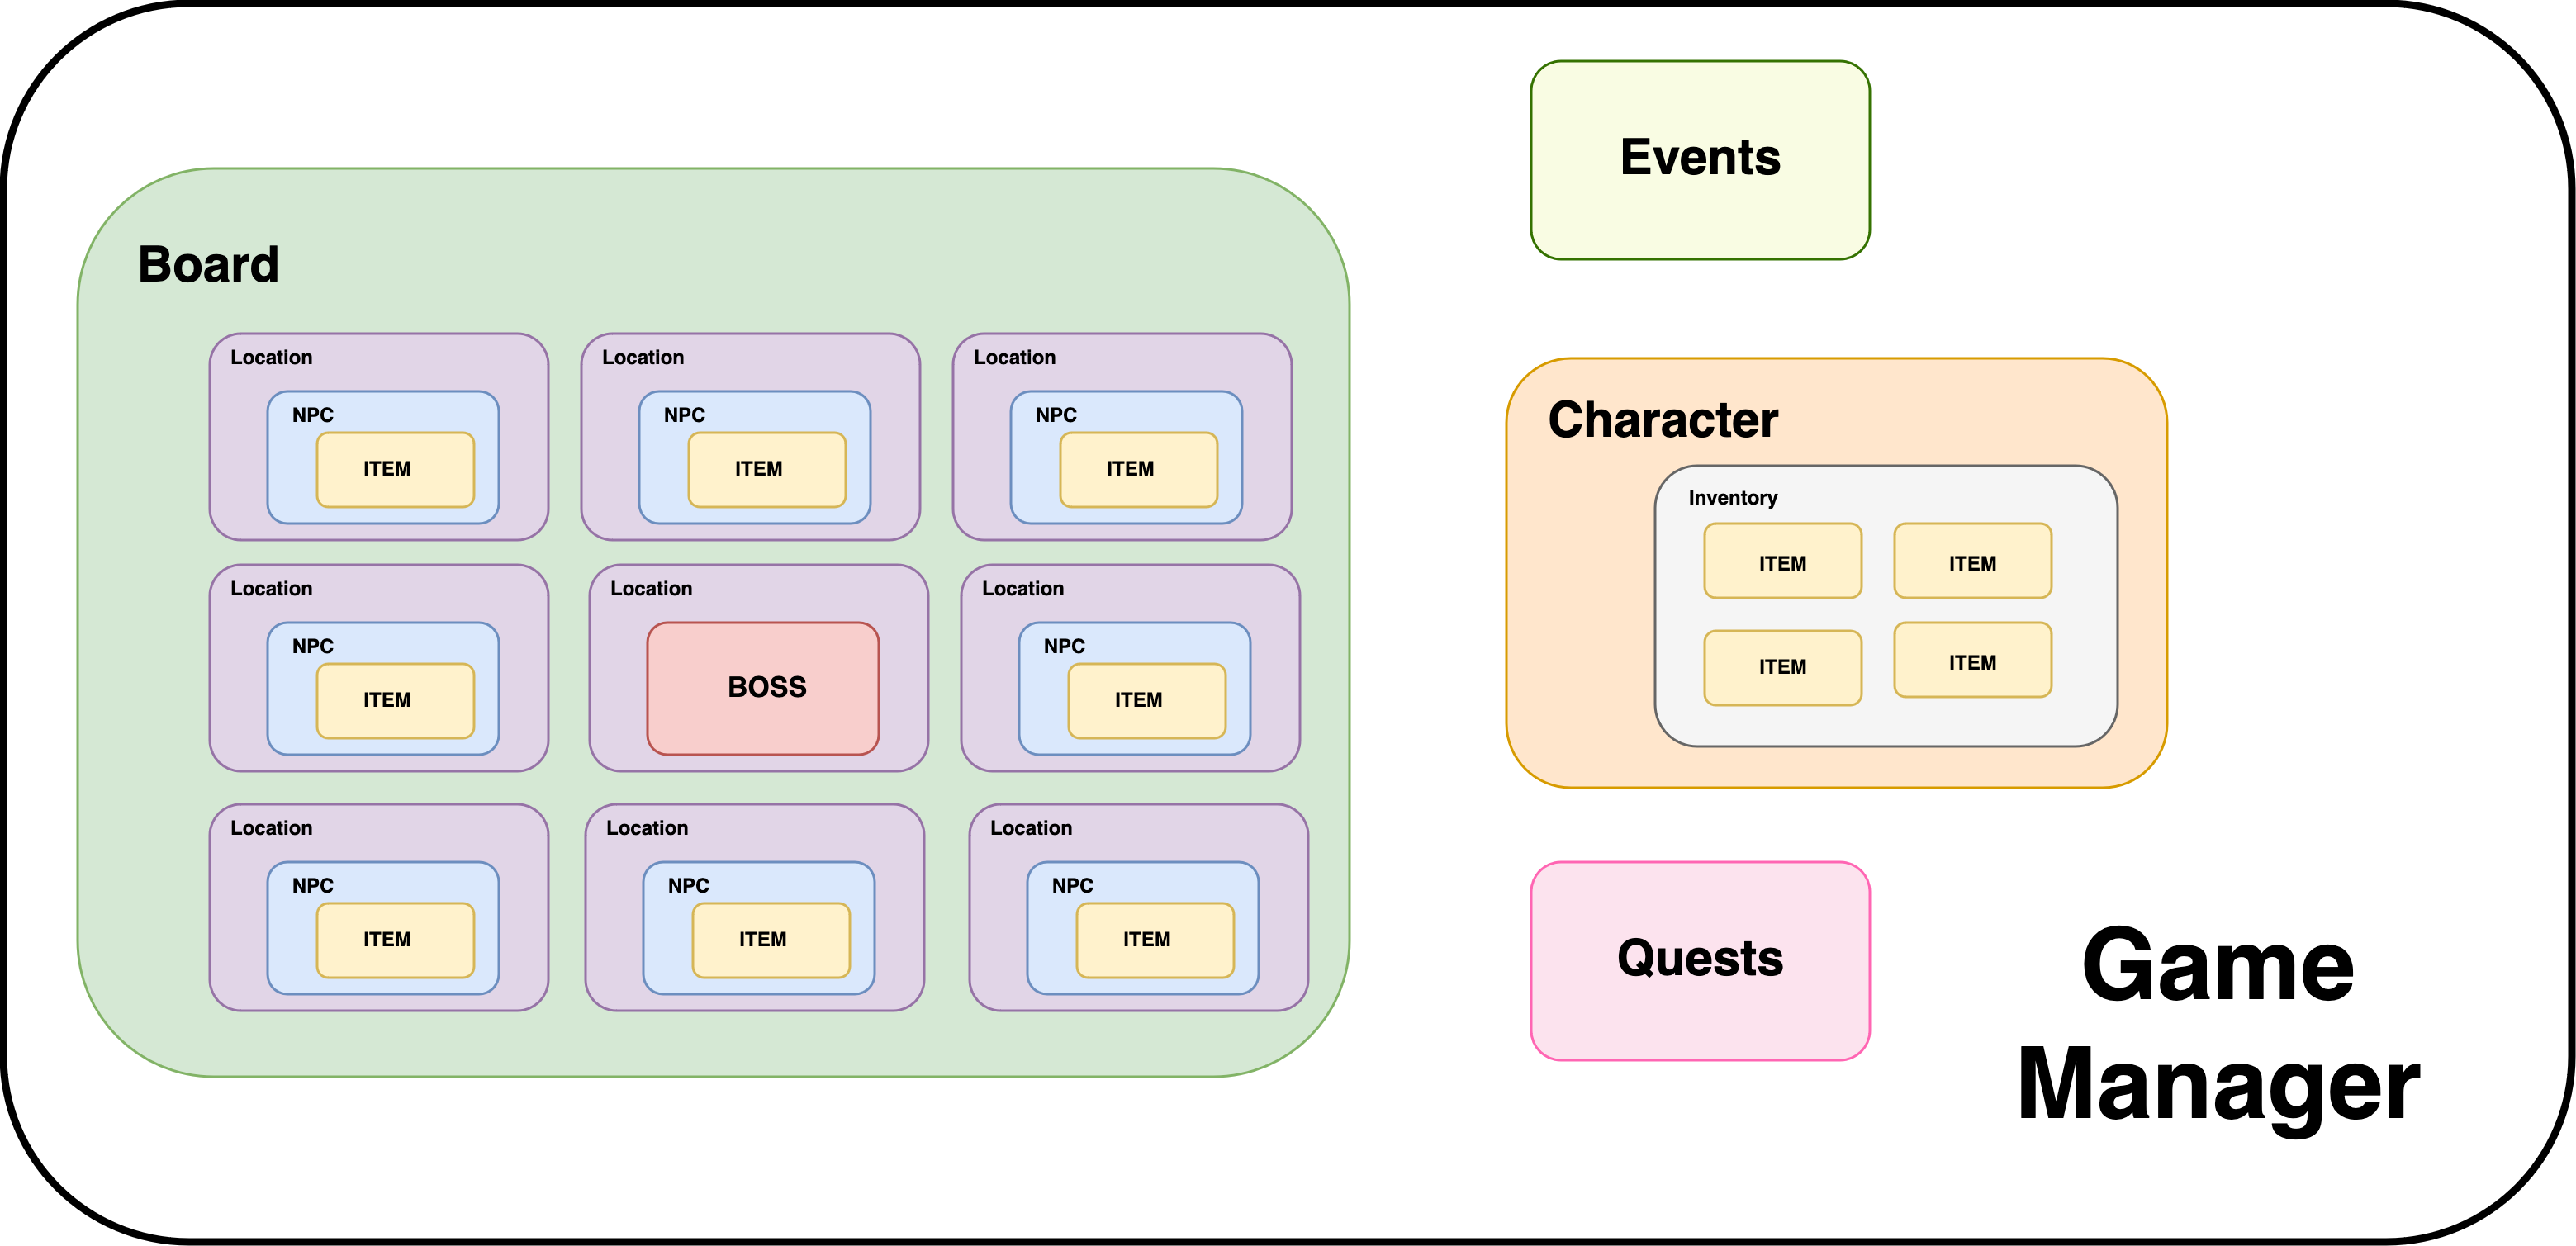

In [4]:
display(Image(filename=project_path+'images/class2/game_manager.drawio.png', width=800, height=400))

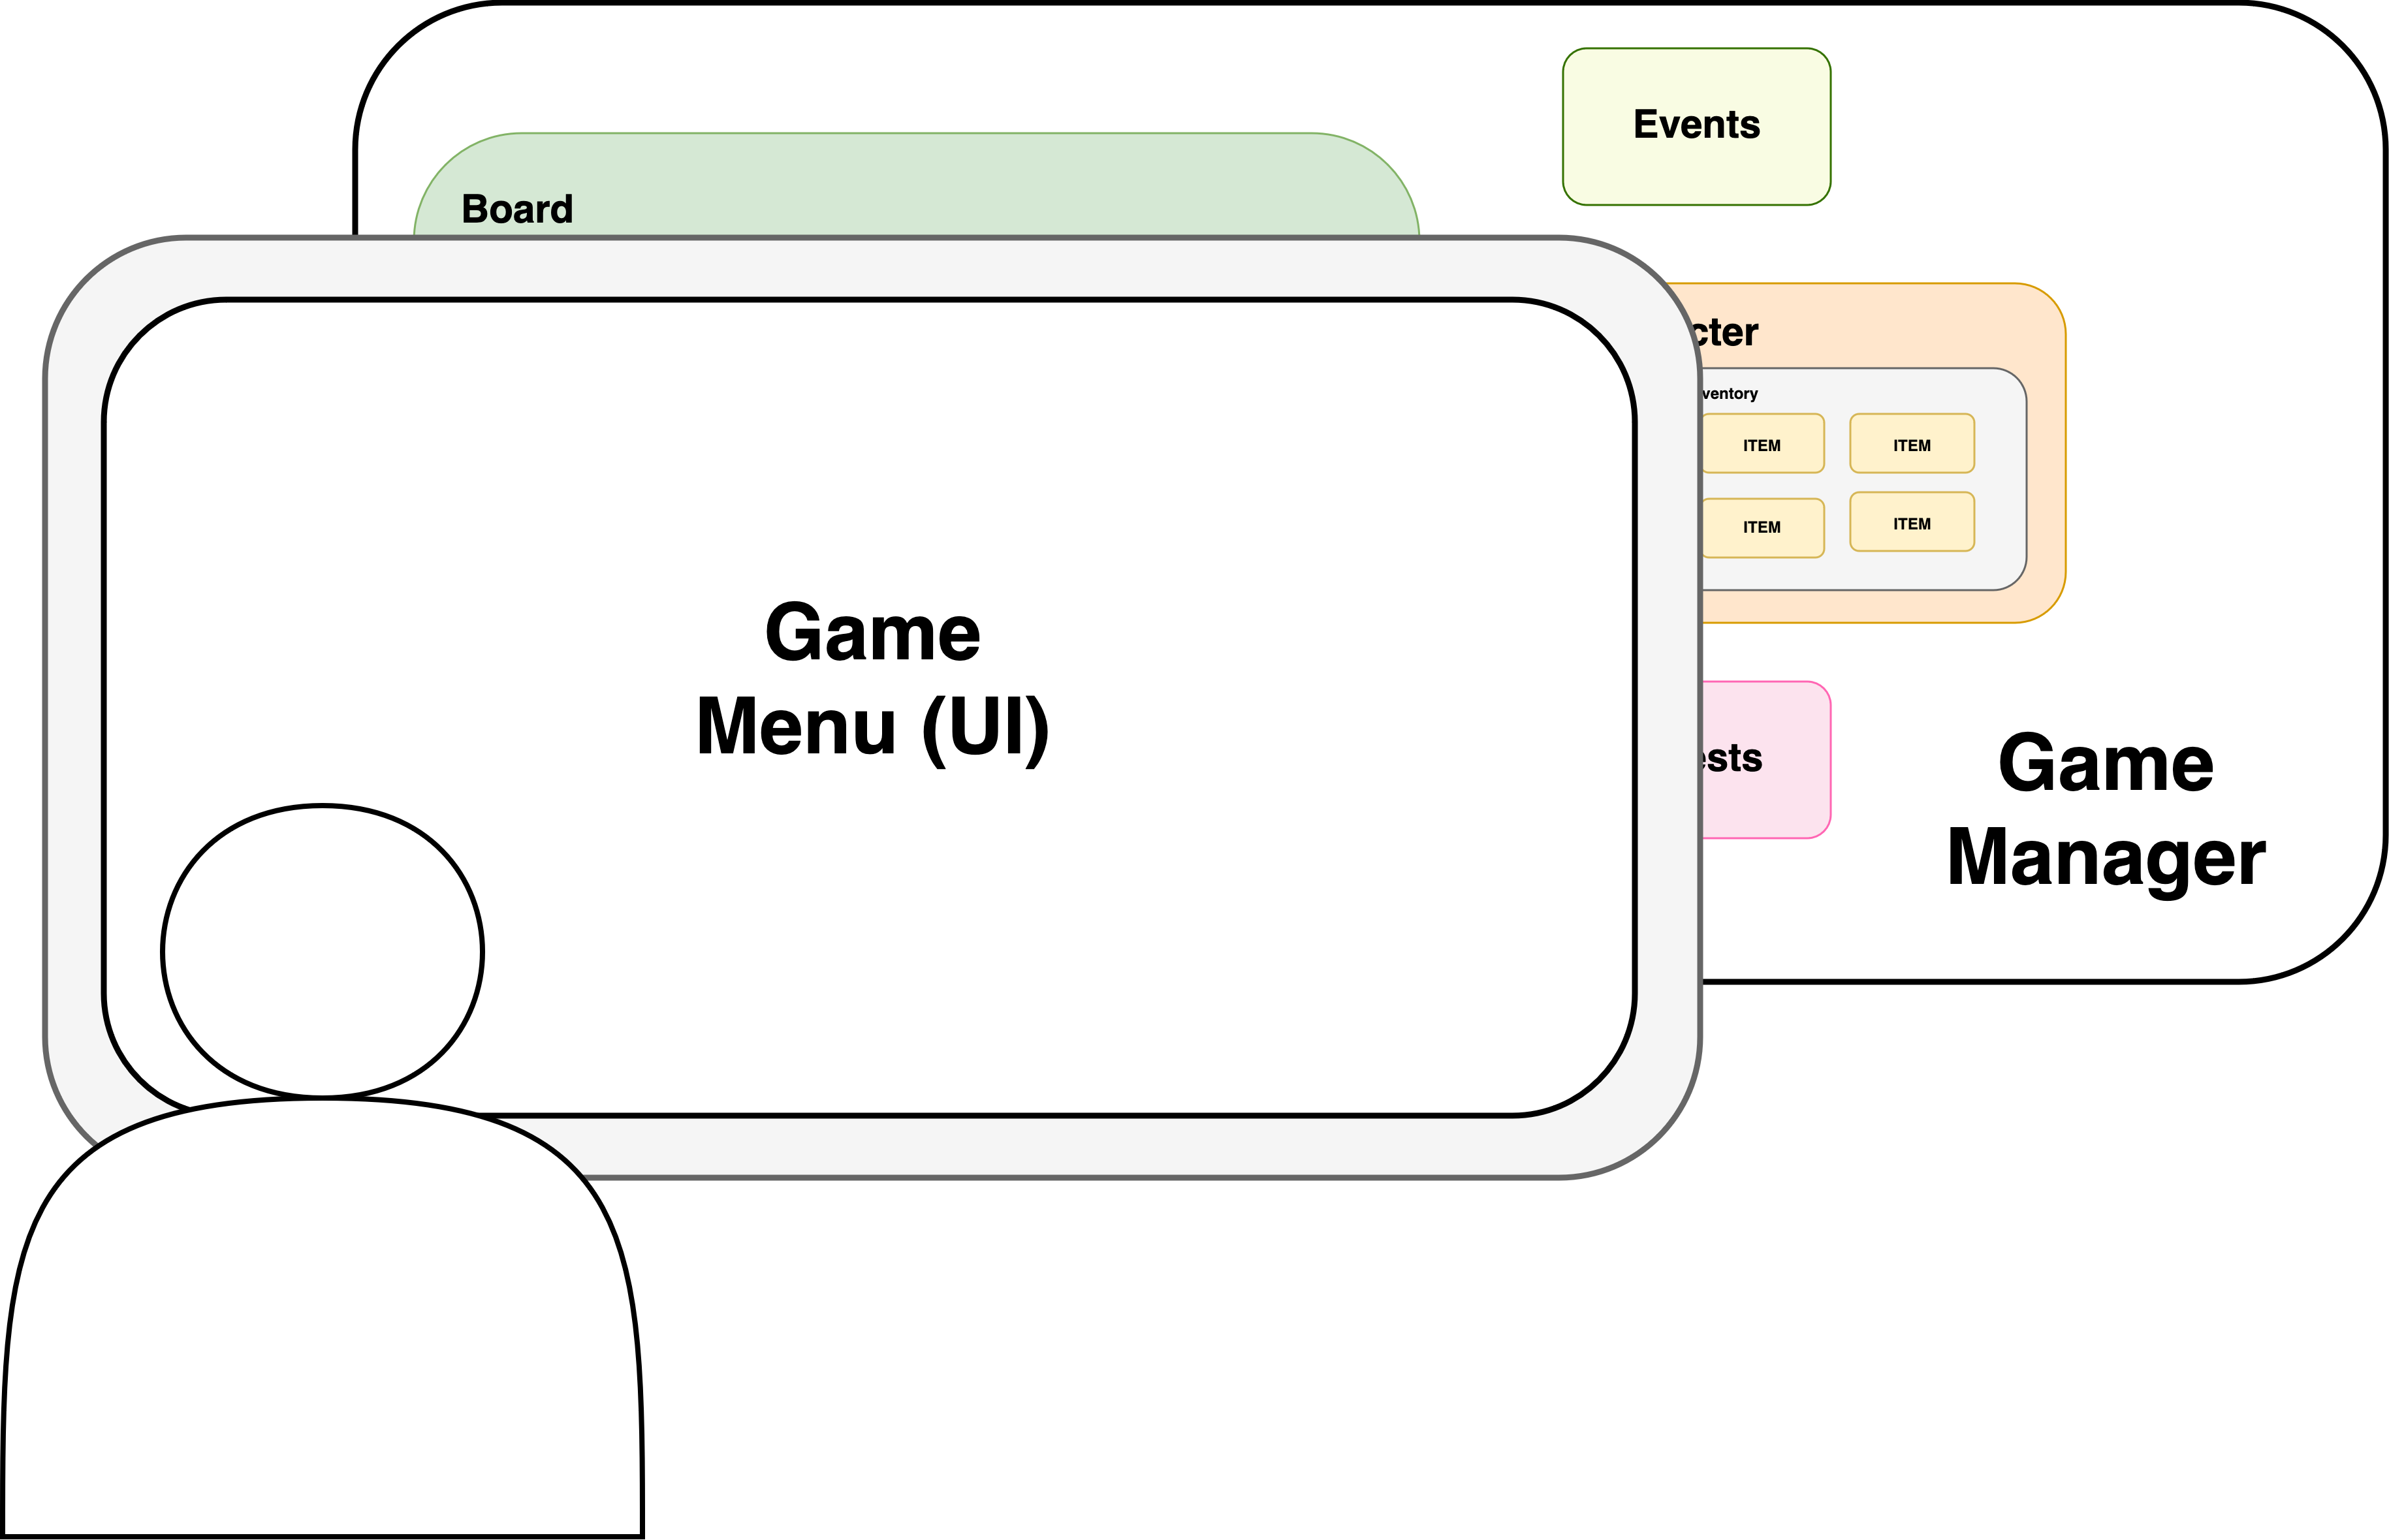

In [5]:
display(Image(filename=project_path+'images/class2/game_ui.png', width=800, height=400))

## Exercise 1: Implement the `GameManager` Class

Implement a `GameManager` Class that is responsible to simulate the game where a player interacts with a board, faces bosses, and completes quests. The class should handle various game mechanics such as player movement, combat, inventory management, and quest completion.

1. `__init__(self, player, board, bosses, quests)`
- **Purpose**: This is the constructor of the `GameManager` class. It initializes the game by setting up the player, board, bosses, and quests. It also places the bosses randomly on the board.
- **Arguments**:
  - `player`: An object representing the player/character. 
  - `board`: An object representing the game board.
  - `bosses`: A list of boss objects that the player will encounter.
  - `quests`: A list of quest objects representing tasks the player can complete.
- **Other Initialization**:
  - `self.place_bosses(bosses)`: Places the bosses randomly on the board.
  - `self.options`: A list of available player actions during the game: `["Move", "Check inventory", "Use item", "View quests", "Exit game", "Buy from merchant", "Fight boss", "Complete quest"]`

---

2. `get_player_position(self)`
- **Purpose**: Property method to retrieve the current position of the player on the board.
- **Returns**: 
  - The player’s position as a tuple `(x, y)`.

---

3. `get_board_location(self, x, y)`
- **Purpose**: Returns the details of a specific location on the board based on the coordinates `x` and `y`. This method helps retrieve information about a tile, such as whether there’s a merchant, a quest, or a boss.
- **Arguments**:
  - `x`: The x-coordinate of the desired location.
  - `y`: The y-coordinate of the desired location.
- **Returns**: 
  - A location object.

---

4. `move_player(self, direction)`
- **Purpose**: Moves the player in the specified direction on the board.
- **Arguments**:
  - `direction`: A string representing the direction to move the player. Accepted values are:
    - `'N'`: Move North.
    - `'S'`: Move South.
    - `'E'`: Move East.
    - `'W'`: Move West.
- **Behavior**:
  - This method calls `self.player.move(direction)` to update the player's position. 
  - If an invalid direction is provided, it prints "Invalid direction".

---

5. `place_bosses(self, bosses)`
- **Purpose**: Randomly places bosses on the game board, ensuring they are not placed on the player’s starting position and that no two bosses occupy the same space.
- **Arguments**:
  - `bosses`: A list of boss objects.

---

6. `show_board(self)`
- **Purpose**: Displays a color-coded visual representation of the current state of the board, including the player's position and boss locations.
- **Behavior**:
  - Iterates over the rows and columns of the board, checking whether each location contains the player or a boss.
  - Uses ANSI escape codes to highlight:
    - Player's position in **green**.
    - Boss positions in **red**.
    - Special locations like "King's Landing" in **black**.
  - Prints the formatted board to the console.

  - Example: `f"\033[31m{location.name}\033[0m"` is red, `f"\033[32m{location.name}\033[0m"` is green and `f"\030[31m{location.name}\033[0m"` is black


---


In [8]:
import random

class GameManager:
    def __init__(self, player, board, bosses, quests):
        self.options = ["Move", "Check inventory", "Use item", "View quests", "Exit game", "Buy from merchant", "Fight boss", "Complete quest"]
        self.player = player
        self.board = board
        self.bosses = bosses
        self.quests = quests
        
    @property
    def get_player_position(self):
        return self.player.position
        
    def get_board_location(self, x, y):
        return self.board.get_location(x,y)

    def move_player(self, direction):
        hashmap = {"N": "north", "S": "south", "E": "east", "W": "west"}
        try:
            self.player.move(hashmap[direction])
            return 1
    
        except:
            print("Invalid direction")
            return 0

    def place_bosses(self, bosses):
        available = [(x, y) for x in range(self.board.size) for y in range(self.board.size)]
        available.remove(self.player.position)
        for boss in bosses:
            if available:
                loc = random.choice(available)
                available.remove(loc)
                boss.position = loc
            else:
                print("NOTE: some bosses have not been placed as board has ran out")
                break

    @property
    def show_board(self):
        for i, row in enumerate(self.board.board_representation):
            row_str = "| "
            for j, location in enumate(row):
                loc_str = ""
                if (i,j) == self.player.position:
                    loc_str = f"\033[32m{location.name}\033[0m"
                elif (i,j) in [boss.position for boss in self.bosses]:
                    loc_str = f"\033[31m{location.name}\033[0m"
                elif self.get_board_location(i,j).name == "King's Landing":
                    loc_str = f"\030[31m{location.name}\033[0m"
                else:
                    loc_str = location.name
            row_str += loc_str + "|"
            print(row_str)
        print()

7. `handle_use_item(self)`
- **Purpose**: Allows the player to use an item from their inventory.
- **Behavior**:
  - If the player's inventory contains items, it prompts the player to select one to use.
  - It removes the used item from the inventory and displays confirmation.
  - If the inventory is empty, it prints "Your inventory is empty."

---

8. `handle_player_turn(self, option)`
- **Purpose**: Processes the player's selected action during their turn and executes the corresponding behavior.
- **Arguments**:
  - `option`: A string representing the player's selected action from `self.options`.
- **Behavior**:
  - If the player chooses an invalid option, it prints "Invalid option."
  - If the option is valid, it performs the following:
    - **Move**: Prompts the player for a direction, then moves the player using `self.move_player()`.
    - **Check inventory**: Displays the player's inventory items.
    - **Use item**: Calls `self.handle_use_item()` to allow the player to use an item.
    - **View quests**: Displays a list of active quests.
    - **Buy from merchant**: Allows the player to interact with an NPC merchant at the current location.
    - **Complete quest**: Checks if the player is at a quest location and completes the quest if possible.
    - **Fight boss**: Initiates combat with a boss if the player is at the same location as a boss.
    - **Exit game**: Exits the game.


In [12]:
import random

class GameManager:
    def __init__(self, player, board, bosses, quests):
        self.options = ["Move", "Check inventory", "Use item", "View quests", "Exit game", "Buy from merchant", "Fight boss", "Complete quest"]
        self.player = player
        self.board = board
        self.bosses = bosses
        self.quests = quests
        
    @property
    def get_player_position(self):
        return self.player.position
        
    def get_board_location(self, x, y):
        return self.board.get_location(x,y)

    def move_player(self, direction):
        hashmap = {"N": "north", "S": "south", "E": "east", "W": "west"}
        try:
            self.player.move(hashmap[direction])
            return 1
    
        except:
            print("Invalid direction")
            return 0

    def place_bosses(self, bosses):
        available = [(x, y) for x in range(self.board.size) for y in range(self.board.size)]
        available.remove(self.player.position)
        for boss in bosses:
            if available:
                loc = random.choice(available)
                available.remove(loc)
                boss.position = loc
            else:
                print("NOTE: some bosses have not been placed as board has ran out")
                break

    @property
    def show_board(self):
        for i, row in enumerate(self.board.board_representation):
            row_str = "| "
            for j, location in enumate(row):
                loc_str = ""
                if (i,j) == self.player.position:
                    loc_str = f"\033[32m{location.name}\033[0m"
                elif (i,j) in [boss.position for boss in self.bosses]:
                    loc_str = f"\033[31m{location.name}\033[0m"
                elif self.get_board_location(i,j).name == "King's Landing":
                    loc_str = f"\030[31m{location.name}\033[0m"
                else:
                    loc_str = location.name
            row_str += loc_str + "|"
            print(row_str)
        print()

    def handle_use_item(self):
        if self.player.inventory.items:
            print("Select an item to use: ")
            for item in self.player.inventory.items:
                print(f"- {item.name}")
            choose = input("> ")
            while choose not in [item.name for item in self.player.inventory.items]:
                print("Invalid choice")
                return 0
                
            self.player.use_item(choose)
        
        else:
            print("No items in inventory")

    def handle_player_turn(self, option):
        if option not in self.options:
            print("Invalid choice")
            return 0
        
        elif option == "Exit Game":
            exit()
            
        elif option == "Move":
            direction = input("Where? (N/E/S/W)\n> ")
            self.move_player(direction)
            
        elif option == "Check inventory":
            for item in self.player.inventory.items:
                print(f"{item.name}: {item.description}")
        
        elif option == "Use item":
            self.handle_use_item()
        
        elif option == "View quests":
            print("Your Quests:")
            for quest in self.quests:
                print(quest)
                
        elif option == "Buy from merchant":
            print(f"You have {self.player.gold} gold")
            loc = self.get_board_location(player.position[0], player.position[1])
            for npc in current_location.npcs:
                if npc.type == "Merchant":
                    npc.trade(self.player)
                    
        elif option == "Complete quest":
            for quest in self.quests:
                if quest.location == self.get_board_location(*self.get_player_position):
                    quest.complete(self.player)
                
        elif option == "Fight boss":
            to_fight = None
            for boss in bosses:
                if boss.position == player.position:
                    to_fight = boss
                    break
            
            if not to_fight:
                handle_boss_combat(to_fight, player)
                
            else:
                print("No boss")
                return 0
            
    def handle_boss_combat(self, boss, player):
        print("\n")
        print(f"Boss encountered: {boss.name}")

        self.player.defending = False

        while 1:
            print(f"{player.name}: {player.health}")
            print(f"{boss.name}: {boss.health}")

            if not self.player.defending:
                print("Select an action:")
                print("1. Use item")
                print("2. Run")
                print("3. Attack")

                choice = input("> ")

                if choice == '1':
                    self.handle_use_item()

                elif choice == '2':
                    print("You ran way...")
                    break

                elif choice == '3':
                    coeff = random.uniform(.5, 1.5)
                    damage = player.strength*coeff
                    boss.take_damage(damage)
                    print(f"{player.name} attacks {boss.name} for {damage} damage")

                    if boss.is_alive:
                        self.player.defending = 1
                    else:
                        print(f"{boss.name} perished")
                        player.earn_gold(200)
                        print(f"{player.name} earned 200 gold")
                        break

                else:
                    p = random.random()
                    if p < 0.05:
                        print(f"{boss.name} used its special attack!")
                        boss.use_special_ability()

                    else:
                        coeff = random.uniform(.5, 1.5)
                        damage = boss.strength * coeff
                        player.take_damage(damage)
                        print(f"{boss.name} attacks {player.name} for {damage} damage")

                        if player.is_alive:
                            self.player_defending = 0
                        else:
                            print(f"You perished!")
                            exit()

9. `handle_boss_combat(self, boss, player)`
- **Purpose**: Manages the turn-based combat between the player and a boss.
- **Arguments**:
  - `boss`: The boss object the player is fighting.
  - `player`: The player object engaged in the combat.
- **Behavior**:
  - Displays both the player’s and boss’s health.
  - Offers the player three choices:
    - **Use item**: Use an item from the inventory to heal or enhance stats.
    - **Run**: Escape from the battle.
    - **Attack**: Perform a standard attack.
  - Bosses have a small chance to use special abilities (5%).
  - Random damage is calculated for both the player and the boss based on strength and a random coefficient.
  - If the player’s health reaches zero, the game ends. If the boss’s health reaches zero, the player earns a reward.


In [13]:

def handle_boss_combat(self, boss, player):
    print("\n")
    print(f"Boss encountered: {boss.name}")
    
    self.player.defending = False
    
    while 1:
        print(f"{player.name}: {player.health}")
        print(f"{boss.name}: {boss.health}")
        
        if not self.player.defending:
            print("Select an action:")
            print("1. Use item")
            print("2. Run")
            print("3. Attack")
            
            choice = input("> ")
            
            if choice == '1':
                self.handle_use_item()
                
            elif choice == '2':
                print("You ran way...")
                break
            
            elif choice == '3':
                coeff = random.uniform(.5, 1.5)
                damage = player.strength*coeff
                boss.take_damage(damage)
                print(f"{player.name} attacks {boss.name} for {damage} damage")
                
                if boss.is_alive:
                    self.player.defending = 1
                else:
                    print(f"{boss.name} perished")
                    player.earn_gold(200)
                    print(f"{player.name} earned 200 gold")
                    break
                    
            else:
                p = random.random()
                if p < 0.05:
                    print(f"{boss.name} used its special attack!")
                    boss.use_special_ability()
                    
                else:
                    coeff = random.uniform(.5, 1.5)
                    damage = boss.strength * coeff
                    player.take_damage(damage)
                    print(f"{boss.name} attacks {player.name} for {damage} damage")

                    if player.is_alive:
                        self.player_defending = 0
                    else:
                        print(f"You perished!")
                        exit()

## Exercise 2: Implement the Main Game Loop 

In this exercise, you will implement the **main game loop** . This loop is crucial for the game's progression, as it continuously checks the player's status, triggers events, and allows interaction with the game world.


1. Start the Game Loop

You will need to create a loop that continuously runs the game. This is where the core logic happens, and it will keep the game alive until the player decides to quit or dies.

   - Implement a loop that continuously runs, representing your game’s lifecycle.
   - Inside this loop, the game will check the player's position, trigger events, display the board, and handle actions.


---


2. Check Player's Current Location

Each iteration of the loop should begin by checking where the player is currently positioned on the game board. This will allow the game to update the state and trigger relevant events.

   - Use the player’s current position to retrieve the corresponding location from the board.


---


3. Trigger Events Based on Location

The game should randomly trigger events based on the player's position. These events could be treasure discovery, being ambushed by bandits, or other game-specific scenarios.


   - Once the player's location is known, you can define a probability-based event system to randomly trigger events.
   - For instance, a 20% chance for a bandit encounter and an 80% chance for finding treasure. 
   - Events should have meaningful impacts, reducing health by 10 if encounter bandit or awarding 20 gold if finding treasure.
    such as reducing health or awarding gold.


---


4. Check for Quests, NPCs, or Bosses

Based on the player's position, you should determine if there are any special entities (like quests, NPCs, or bosses) present in the current location. This will allow the player to interact with the game world and progress.

   - Check if the player is at a location where a quest can be started or completed (The Wall). If so, display the quest details.
   - Check if there are any NPCs at the player's current location (e.g., a merchant offering items).
   - Check if there is a boss at the player's location to trigger a boss battle.


---


5. Handle Player Choices

Based on the information gathered from the player's current location (events, quests, NPCs, bosses), update the game menu and present the player with a set of options. The player can then decide what action to take (e.g., move, fight, buy items).

   - After checking the location, update the menu to allow the player to make a choice based on their surroundings.
   - The options should be dynamically adjusted (e.g., show "Fight Boss" if a boss is present or "Buy from Merchant" if an NPC is a merchant).


---


6. Repeat the Loop

After handling the player's choice, reset the menu and repeat the loop. The game will continue to run until the player decides to exit, at which point you should break the loop.

   - Reset the game menu each time to ensure new options are dynamically generated based on the current game state.

In [ ]:
from models.character import Warrior, bosses
from models.house import House
from models.quest import Quest

from game.board import GameBoard
from game.game_manager import GameManager
from game.menu import GameMenu

import random
random.seed(42)

def main():

    defend_wall = Quest("Defend The Wall",
                    "The Wall",
                    "Protect The Wall from the White Walkers.",
                    "You earned 100 gold.",
                    lambda p: p.earn_gold(100),
                    lambda p: game_board.board[p.position[0]][p.position[1]].name == 'The Wall')

    quests = [defend_wall]

    stark = House("Stark", "Direwolf", "Winter is coming")      
    character = Warrior('Jon Snow', stark, 10, 10, 10, 10)

    # Create the game board
    game_board = GameBoard(5)
    
    # Create the game manager
    game_manager = GameManager(character, game_board, bosses, quests)

    # Create the game menu
    game_menu = GameMenu()

    print("\n") 

    # Game loop